<a href="https://colab.research.google.com/github/kamranjaved/Workshop-on-AI-and-Hand-on-training/blob/main/S1%3A%20Digit%20Recognition%20using%20Custom%20ANN/MNIST%20Classification%20using%20Custom%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST digit recognation using Custom ANN
MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker.

Keras is a high-level neural network API focused on user friendliness, fast prototyping, modularity and extensibility. It works with deep learning frameworks like Tensorflow, Theano and CNTK, so we can get right into building and training a neural network

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import CSVLogger
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import random
np.random.seed(0)

#Loading Data
**load data to training set and testing set**
This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the CIFAR homepage.

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Data size
Printing the size of train set and test set.

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


#Check for ERROR

In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

In [7]:
num_of_samples = []

In [8]:
cols = 5
num_classes = 10

#Show random images


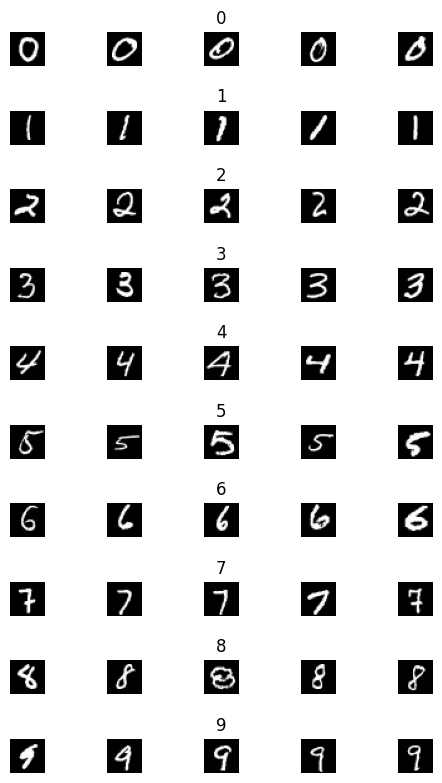

In [9]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

#Distribution of data


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

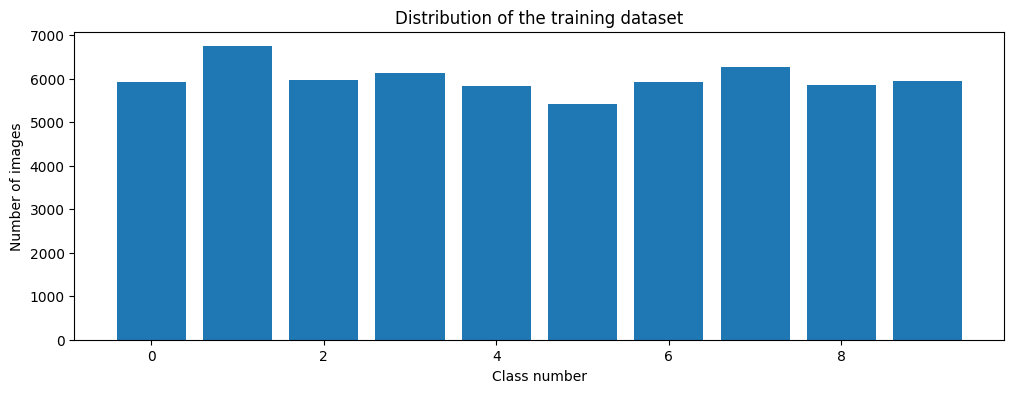

In [10]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

#Pre-Processing the Data
The first step of any Machine Learning, Deep Learning or Data Science project is to pre-process the data. We will be defining the names of the classes, over which the dataset is distributed. There are 10 different classes of color images of size 32x32. Once we have set the class name. We need to normalize the image so that our model can train faster. The pixel range of a color image is 0–255. We will be dividing each pixel of the image by 255 so the pixel range will be between 0–1. Actually, we will be dividing it by 255.0 as it is a float operation.

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

#Building model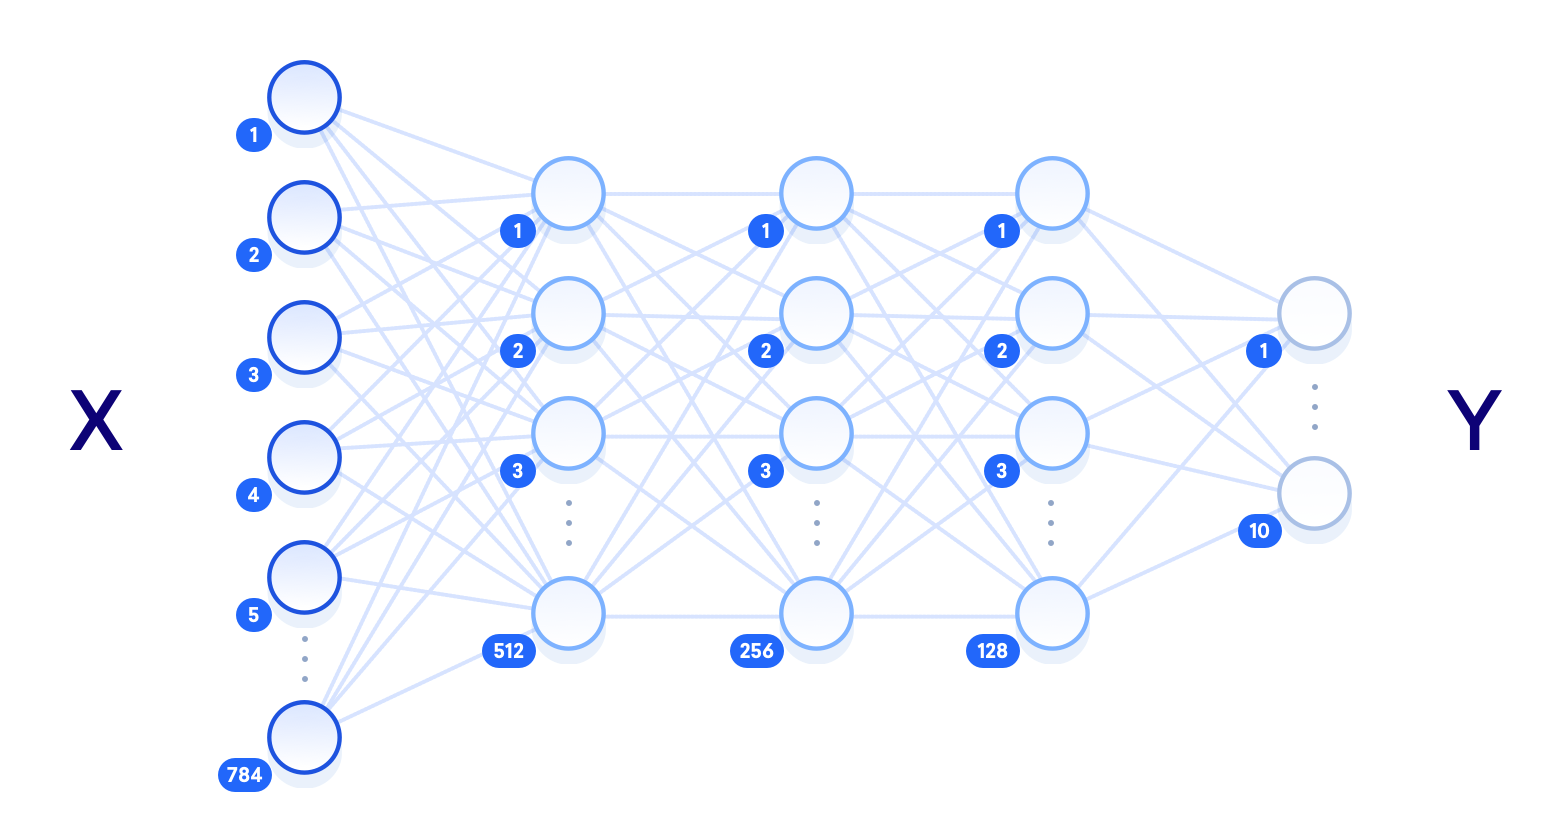

In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    # model.add(Dense(10, activation='sigmoid'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [18]:
model = create_model()
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,600 (33.59 KB)

 Trainable params: 8,600 (33.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [22]:
csv_logger = CSVLogger('/content/drive/MyDrive/TrainedModels/MnistANN.log', separator=',', append=False)

In [23]:
num_epochs=15

In [24]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs =num_epochs, batch_size = 200, verbose = 1, shuffle = 1,callbacks=[csv_logger])

Epoch 1/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5539 - loss: 1.1966 - val_accuracy: 0.8550 - val_loss: 0.4561
Epoch 2/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8550 - loss: 0.4675 - val_accuracy: 0.9032 - val_loss: 0.3318
Epoch 3/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3778 - val_accuracy: 0.9160 - val_loss: 0.2966
Epoch 4/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8943 - loss: 0.3519 - val_accuracy: 0.9012 - val_loss: 0.3275
Epoch 5/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8978 - loss: 0.3356 - val_accuracy: 0.9125 - val_loss: 0.2897
Epoch 6/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9021 - loss: 0.3261 - val_accuracy: 0.9197 - val_loss: 0.2783
Epoch 7/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9076 - loss: 0.3085 - val_accuracy: 0.9140 - val_loss: 0.2837
Epoch 8/15
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9066 - loss: 0.3072 - val_accuracy: 0.

In [25]:
# Please save your model
model.save('/content/drive/MyDrive/TrainedModels/MnistANN.h5')

In [26]:
model2=load_model('/content/drive/MyDrive/TrainedModels/MnistANN.h5')
history2 = pd.read_csv('/content/drive/MyDrive/TrainedModels/MnistANN.log', sep=',', engine='python')

#Plot the loss

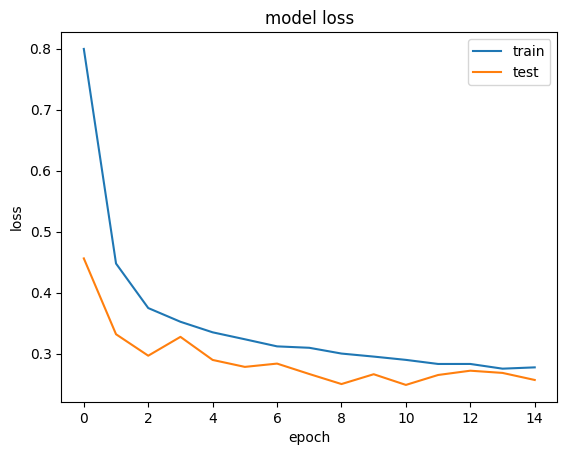

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='loval_lossss')
# ''' for loaded model2 fromdrive'''
# plt.plot(history2['loss'], label='loss')
# plt.plot(history2['val_loss'], label='loval_lossss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

#Plot the accuracy

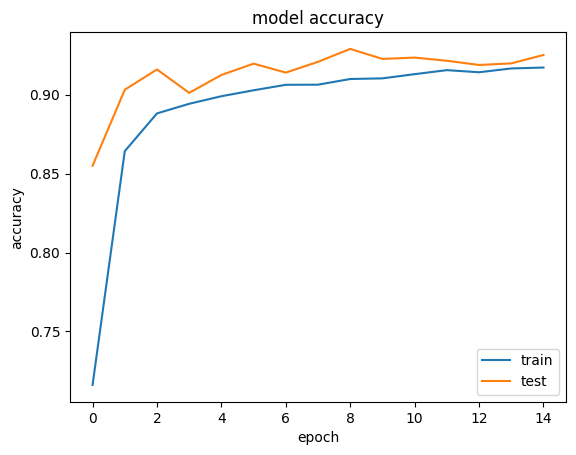

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# ''' for loaded model2 from drive'''
# plt.plot(history2['accuracy'])
# plt.plot(history2['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Evaluate Model

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
# score = model2.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.3096974790096283
Test accuracy: 0.9106000065803528


#Predications

In [33]:
def plot(n,g):
  img=X_test[n]
  img = img.reshape(1, 784)
  # Use model.predict() and np.argmax() instead of predict_classes()
  prediction = np.argmax(model.predict(img), axis=-1)
  # prediction = np.argmax(model2.predict(img), axis=-1)
  print("predicted digit:", str(prediction))
  g.imshow(X_test[n].reshape((28,28)))
  g.title.set_text("predicted digit:"+ str(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
predicted digit: [8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted digit: [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted digit: [3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
predicted digit: [9]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
predicted digit: [7]


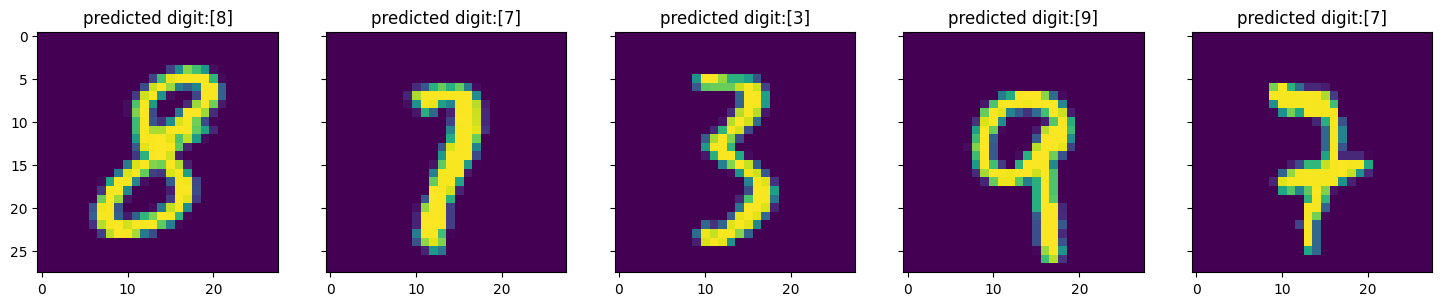

In [34]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5, sharey=True,figsize=(18, 18))
plot(110,ax1)
plot(111,ax2)
plot(112,ax3)
plot(113,ax4)
plot(114,ax5)
# plot(25,ax6)
# plot(26,ax7)
# plot(27,ax8)